In [1]:
from astropy.table import Table

%matplotlib inline

from mass_ratio_plottingFunctions import DM_SM_hist, DM_SM_hist_std

import numpy as np

In [20]:
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = Table.read('master_file_vflag_6.txt', format='ascii.ecsv')

In [21]:
###############################################################################
# Initialize the master arrays that will hold the wall and void mass ratios
#    for plotting the histogram.
#------------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = []
dm_to_stellar_mass_ratio_void = []
###############################################################################


###############################################################################
# Split galaxies into "walls" and "voids"
#------------------------------------------------------------------------------
vboolean = master_table['vflag'].data == 1
wboolean = master_table['vflag'].data == 0

void_table = master_table[vboolean]
wall_table = master_table[wboolean]
###############################################################################


###############################################################################
# Separate the mass ratios according to wall or void
#------------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = wall_table['Mdark_Mstar_ratio'].data
dm_to_stellar_mass_ratio_void = void_table['Mdark_Mstar_ratio'].data

dm_to_stellar_mass_ratio_err_wall = wall_table['Mdark_Mstar_ratio_error'].data
dm_to_stellar_mass_ratio_err_void = void_table['Mdark_Mstar_ratio_error'].data
###############################################################################


###############################################################################
# Lists cannot be raised to powers, and this operation is needed to find
#    RMS of the data in question. Thus, the mass ratio lists are converted
#    into np.array() instances here.
#------------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = np.array( dm_to_stellar_mass_ratio_wall)
dm_to_stellar_mass_ratio_void = np.array( dm_to_stellar_mass_ratio_void)
###############################################################################

'''
###############################################################################
# Calculate the mean, RMS, and standard deviation for the void, wall, and
#    total distributions in the histogram below.
#------------------------------------------------------------------------------
ratio_mean = np.mean( dm_to_stellar_mass_ratio_list)
ratio_stdev = np.std( dm_to_stellar_mass_ratio_list)
ratio_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_list**2))

ratio_wall_mean = np.mean( dm_to_stellar_mass_ratio_wall)
ratio_wall_stdev = np.std( dm_to_stellar_mass_ratio_wall)
ratio_wall_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_wall**2))

ratio_void_mean = np.mean( dm_to_stellar_mass_ratio_void)
ratio_void_stdev = np.std( dm_to_stellar_mass_ratio_void)
ratio_void_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_void**2))
###############################################################################
'''

###############################################################################
# Histogram parameters
#------------------------------------------------------------------------------
hist_range = ( 0, 60)
bins = np.linspace( hist_range[0], hist_range[1], 13)
###############################################################################


###############################################################################
# Initialize table to store the number of galaxies in each bin of the 
# histogram(s).
#------------------------------------------------------------------------------
count_table = Table()

# First column is the bins
count_table['Bins'] = bins[1:]
###############################################################################

## Function to calculate shift between populations

In [22]:
def calculate_shift(void_ratios, wall_ratios, void_ratio_errors, wall_ratio_errors):
    '''
    Calculate the average shift between the void and wall populations.
    
    
    Parameters:
    ===========
    
    void_ratios : numpy array of shape (n_void,)
        Array of the mass ratios for the void galaxies
        
    wall_ratios : numpy array of shape (n_wall,)
        Array of the mass ratios for the wall galaxies
        
    void_ratio_errors : numpy array of shape (n_void,)
        Array of the errors in the mass ratios for the void galaxies
        
    wall_ratio_errors : numpy array of shape (n_wall,)
        Array of the errors in the mass ratios for the wall galaxies
    '''
    #######################################################################
    # Calculate averages, shift between voids and walls
    #----------------------------------------------------------------------
    v_mean = np.mean(dm_to_stellar_mass_ratio_void)
    w_mean = np.mean(dm_to_stellar_mass_ratio_wall)

    v_median = np.median(dm_to_stellar_mass_ratio_void)
    w_median = np.median(dm_to_stellar_mass_ratio_wall)

    mean_diff = v_mean - w_mean
    median_diff = v_median - w_median
    #######################################################################


    #######################################################################
    # Calculate uncertainties in the (average) shifts
    #----------------------------------------------------------------------
    # Preserve only finite elements for error calculation
    v_finite = dm_to_stellar_mass_ratio_err_void[np.isfinite(dm_to_stellar_mass_ratio_err_void)]
    w_finite = dm_to_stellar_mass_ratio_err_wall[np.isfinite(dm_to_stellar_mass_ratio_err_wall)]

    v_mean_err = np.sqrt(np.sum(v_finite**2))/len(v_finite)
    w_mean_err = np.sqrt(np.sum(w_finite**2))/len(w_finite)

    mean_diff_err = np.sqrt(v_mean_err**2 + w_mean_err**2)
    #######################################################################


    print('The average difference between the two populations is', mean_diff, 'pm', mean_diff_err)
    print('The median difference between the two populations is', median_diff)

# Histogram of ratio of dark matter halo mass to stellar mass for all galaxies

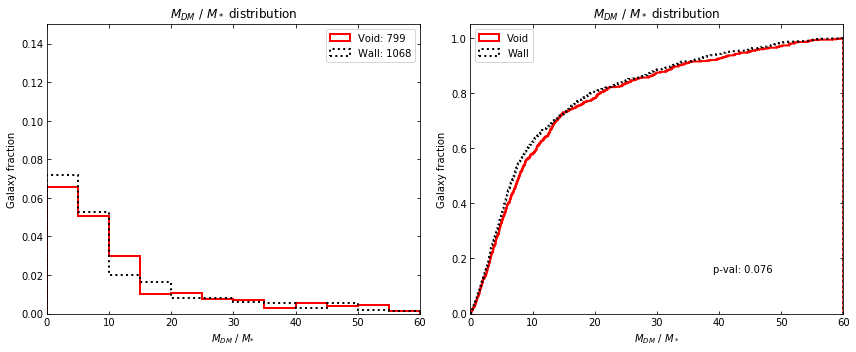

In [23]:
DM_SM_hist(dm_to_stellar_mass_ratio_void, dm_to_stellar_mass_ratio_wall)#, bins, hist_range, 
           #save_fig=True, FILE_SUFFIX='_all', IMAGE_DIR=IMAGE_DIR)

# Bin by absolute magnitude

### Dwarf galaxies (Mr > -17)

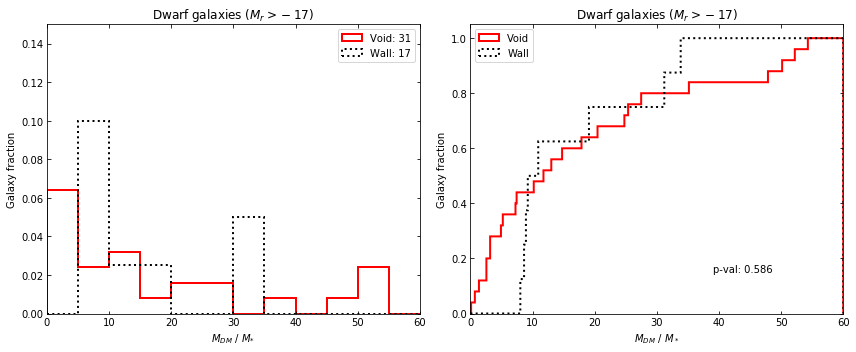

In [24]:
vboolean = void_table['rabsmag'].data >= -17
wboolean = wall_table['rabsmag'].data >= -17

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
dwarf_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
dwarf_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_dwarf'], _ = np.histogram(dwarf_void, bins)
count_table['w_dwarf'], _ = np.histogram(dwarf_wall, bins)
###########################################################################

DM_SM_hist(dwarf_void, dwarf_wall, #bins, hist_range, 
           plot_title='Dwarf galaxies ($M_r > -17$)')#, save_fig=True, 
           #FILE_SUFFIX='_dwarf', IMAGE_DIR=IMAGE_DIR)

### Galaxies between -17 and -18 in Mr

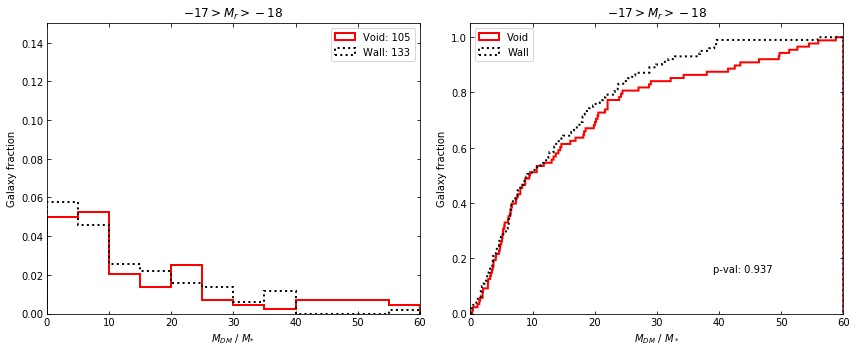

In [25]:
vboolean = np.logical_and(void_table['rabsmag'].data < -17, void_table['rabsmag'].data >= -18)
wboolean = np.logical_and(wall_table['rabsmag'].data < -17, wall_table['rabsmag'].data >= -18)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g17_18_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g17_18_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_17_18'], _ = np.histogram(g17_18_void, bins)
count_table['w_17_18'], _ = np.histogram(g17_18_wall, bins)
###########################################################################

DM_SM_hist(g17_18_void, g17_18_wall, #bins, hist_range, 
           plot_title='$-17 > M_r > -18$')#, save_fig=True, FILE_SUFFIX='_17-18', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -18 and -19 in Mr

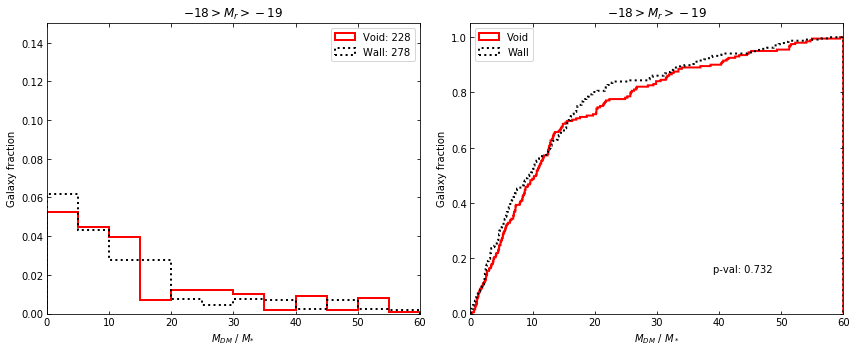

In [26]:
vboolean = np.logical_and(void_table['rabsmag'].data < -18, void_table['rabsmag'].data >= -19)
wboolean = np.logical_and(wall_table['rabsmag'].data < -18, wall_table['rabsmag'].data >= -19)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g18_19_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g18_19_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_18_19'], _ = np.histogram(g18_19_void, bins)
count_table['w_18_19'], _ = np.histogram(g18_19_wall, bins)
###########################################################################

DM_SM_hist(g18_19_void, g18_19_wall, #bins, hist_range, 
           plot_title='$-18 > M_r > -19$')#, save_fig=True, FILE_SUFFIX='_18-19', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -19 and -20 in Mr

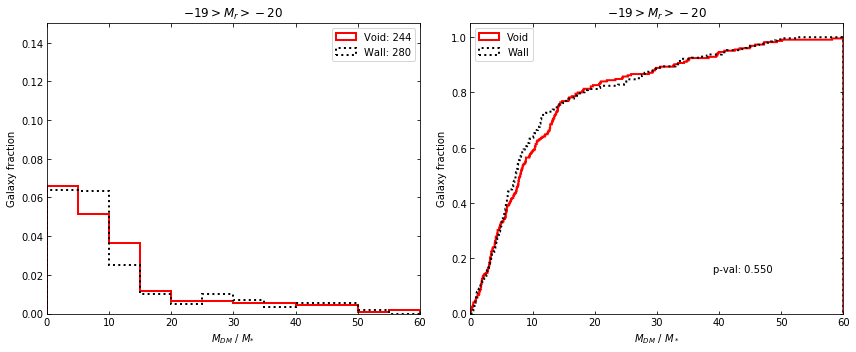

In [27]:
vboolean = np.logical_and(void_table['rabsmag'].data < -19, void_table['rabsmag'].data >= -20)
wboolean = np.logical_and(wall_table['rabsmag'].data < -19, wall_table['rabsmag'].data >= -20)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g19_20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g19_20_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_19_20'], _ = np.histogram(g19_20_void, bins)
count_table['w_19_20'], _ = np.histogram(g19_20_wall, bins)
###########################################################################

DM_SM_hist(g19_20_void, g19_20_wall, #bins, hist_range, 
           plot_title='$-19 > M_r > -20$')#, save_fig=True, FILE_SUFFIX='_19-20', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies with Mr < -20

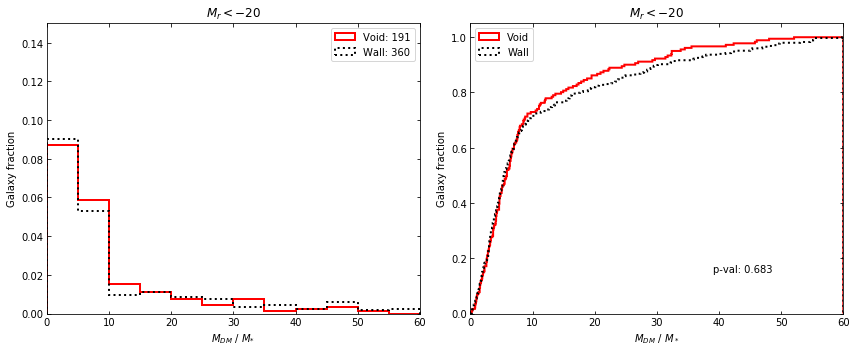

In [28]:
vboolean = void_table['rabsmag'].data < -20
wboolean = wall_table['rabsmag'].data < -20

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g20_void = void_table['Mdark_Mstar_ratio'][vboolean].data
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_20plus'], _ = np.histogram(g20_void, bins)
count_table['w_20plus'], _ = np.histogram(g20_wall, bins)
###########################################################################

DM_SM_hist(g20_void, g20_wall, #bins, hist_range, 
           plot_title='$M_r < -20$')#, 
           #save_fig=True, FILE_SUFFIX='_bright', IMAGE_DIR=IMAGE_DIR)

## Write histogram table to file

In [ ]:
count_table.write('histogram_counts.txt', format='ascii.commented_header')